In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Transformation

Feature Transformations are techniques used to modify the distributional properties of features within a dataset. These transformations help address issues like skewness or nonlinearity, making the data more suitable for modeling.

## Types of Feature Transformation

1. Function Transformation
2. Power Transformation

# Function Transformation

It involves applying various mathematical functions to features for distributional modification.

## Types of Function Transformations

1. Log Transform
2. Reciprocal Transform
3. Square Transform
4. Square Root Transform

|Log Transform|Reciprocal Transform|Square Transform|Square Root Transform|
|-|-|-|-|
|Right Skewed Data|Flips Samples|Left Skewed Data||

In [2]:
link = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv'
df = pd.read_csv(link,usecols=['Age','Fare','Survived'])

df['Age'].fillna(df['Age'].mean(),inplace=True)
df.sample(5)

,Survived,Age,Fare
690,1,31.0,57.00
426,1,28.0,26.00
385,0,18.0,73.50
441,0,20.0,9.50
407,1,3.0,18.75


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],
                                                 df.iloc[:,0],
                                                 test_size=0.3,
                                                 random_state=2002)

In [4]:
import scipy.stats as stats

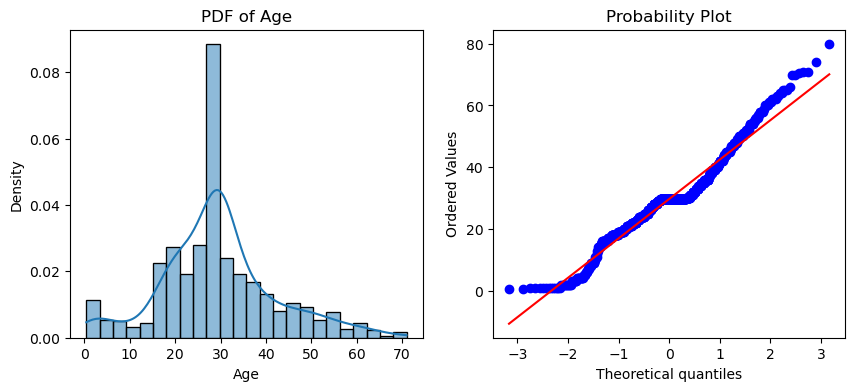

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('PDF of Age')
sns.histplot(X_train['Age'],kde=True,stat='density',ax=ax1)

ax2.set_title('QQ Plot of Age')
stats.probplot(df['Age'],dist='norm',plot=plt);

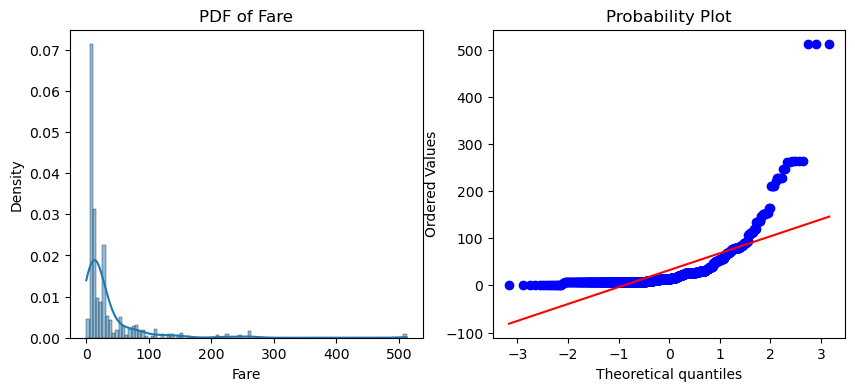

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('PDF of Fare')
sns.histplot(X_train['Fare'],kde=True,stat='density',ax=ax1)

ax2.set_title('QQ Plot of Fare')
stats.probplot(df['Fare'],dist='norm',plot=plt);

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
    
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6305970149253731
Accuracy DT 0.6231343283582089


**Log Transform**

In [12]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(np.log1p)

In [13]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [14]:
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)
    
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6828358208955224
Accuracy DT 0.6194029850746269


**Reciprocal Transform**

In [20]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(lambda x: 1/(x+1e-6))

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)
    
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.5895522388059702
Accuracy DT 0.6156716417910447


**Square Transform**

In [26]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(np.square)

In [27]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [28]:
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)
    
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6007462686567164
Accuracy DT 0.6194029850746269


**Square Root Transform**

In [23]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(np.sqrt)

In [24]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [25]:
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)
    
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.6753731343283582
Accuracy DT 0.6231343283582089


# Power Transformation

It specifically focus on stabilizing variance and achieving normality through raising feature values to certain powers.

## Types of Power Transformations

1. Box-Cox Transformer
2. Yeo-Johnson Transformer

## Box-Cox Transformer

It is a statistical tool that transforms non-normal data into a normal distribution. Its limitation is that is works only on positive numbers.

$$y_i^{(\lambda)} = \begin{cases}
    \frac{{y_i^\lambda - 1}}{{\lambda}}, & \text{if } \lambda \neq 0 \\
    \ln(y_i), & \text{if } \lambda = 0
\end{cases}$$

## Yeo-Johnson Transformer

It is a family of transformations modifies and generalizes the Box-Cox family to handle data where the smallest value of y may be zero or negative.

$$y_i^{(\lambda)} = \begin{cases}
    \left(\frac{{(y_i+1)^\lambda - 1}}{{\lambda}}\right), & \text{if } \lambda \neq 0 \text{ and } y \geq 0, \\
    \ln(y_i + 1), & \text{if } \lambda = 0 \text{ and } y \geq 0, \\
    -\left(\frac{{(-y_i+1)^{2-\lambda} - 1}}{{2-\lambda}}\right), & \text{if } \lambda \neq 2 \text{ and } y < 0, \\
    -\ln(-y_i + 1), & \text{if } \lambda = 2 \text{ and } y < 0.
\end{cases}
$$

In [59]:
link = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv'
df = pd.read_csv(link)

df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
884,300.0,0.0,120.0,212.0,10.0,878.0,728.0,28,23.84
114,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.90
267,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,56,45.08
791,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,180,41.05
876,146.0,230.0,0.0,202.0,3.0,827.0,872.0,28,33.06


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],
                                                 df.iloc[:,-1],
                                                 test_size=0.3,
                                                 random_state=2002)

In [61]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.5568404154201179

**Box-Cox Transformer**

In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
pt = PowerTransformer('box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.138598
1,Blast Furnace Slag,0.031986
2,Fly Ash,-0.036795
3,Water,0.776736
4,Superplasticizer,0.097913
5,Coarse Aggregate,1.024106
6,Fine Aggregate,2.059382
7,Age,0.058266


In [65]:
lr = LinearRegression()

lr.fit(X_train_transformed,y_train)
y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.7635146725722746

In [66]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\402170629.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Blast Furnace Slag'],ax=ax1)
C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\402170629.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Blast Furna

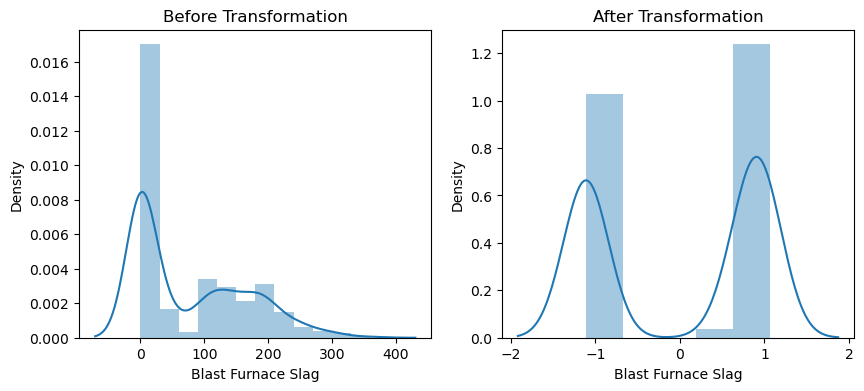

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('Before Transformation')
sns.distplot(X_train['Blast Furnace Slag'],ax=ax1)

ax2.set_title('After Transformation')
sns.distplot(X_train_transformed['Blast Furnace Slag'],ax=ax2);

C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\1585126808.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],ax=ax1)
C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\1585126808.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age'],ax=ax2);


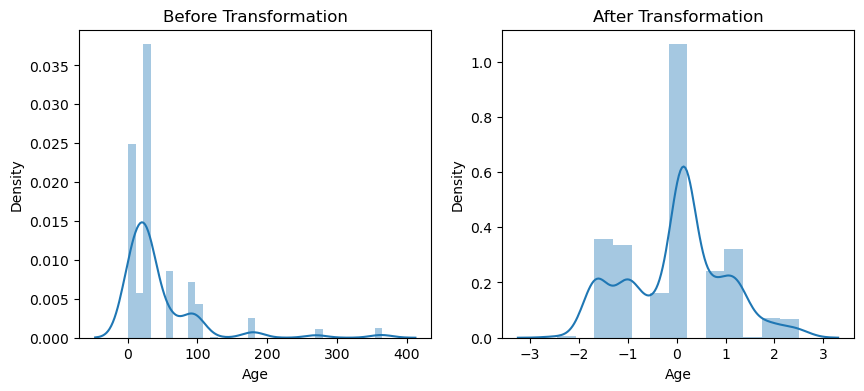

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('Before Transformation')
sns.distplot(X_train['Age'],ax=ax1)

ax2.set_title('After Transformation')
sns.distplot(X_train_transformed['Age'],ax=ax2);

**Yeo-Johnson Transformer**

In [69]:
pt = PowerTransformer()

X_train_transformed2 = pt.fit_transform(X_train)
X_test_transformed2 = pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'yeo_johnson_lambdas':pt.lambdas_})

,cols,yeo_johnson_lambdas
0,Cement,0.135611
1,Blast Furnace Slag,0.036691
2,Fly Ash,-0.152690
3,Water,0.775435
4,Superplasticizer,0.267161
5,Coarse Aggregate,1.024230
6,Fine Aggregate,2.060833
7,Age,0.010596


In [70]:
lr = LinearRegression()

lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)

r2_score(y_test,y_pred3)

0.7678476637836237

In [71]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\2129787788.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Blast Furnace Slag'],ax=ax1)
C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\2129787788.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2['Blast Fu

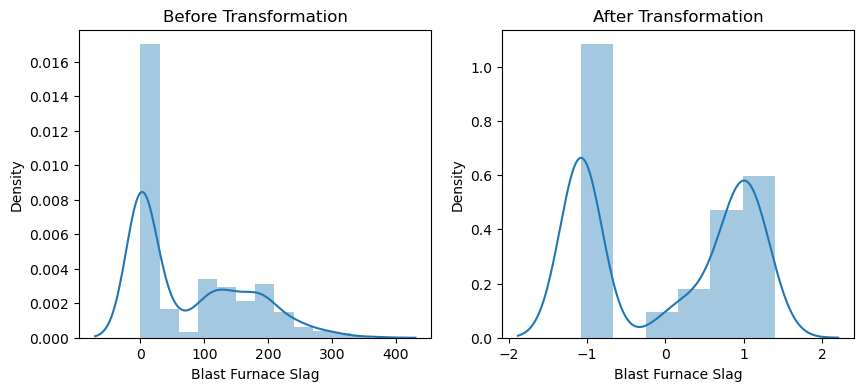

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('Before Transformation')
sns.distplot(X_train['Blast Furnace Slag'],ax=ax1)

ax2.set_title('After Transformation')
sns.distplot(X_train_transformed2['Blast Furnace Slag'],ax=ax2);

C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\3668352389.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],ax=ax1)
C:\Users\Danish\AppData\Local\Temp\ipykernel_11000\3668352389.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2['Age'],ax=ax2);


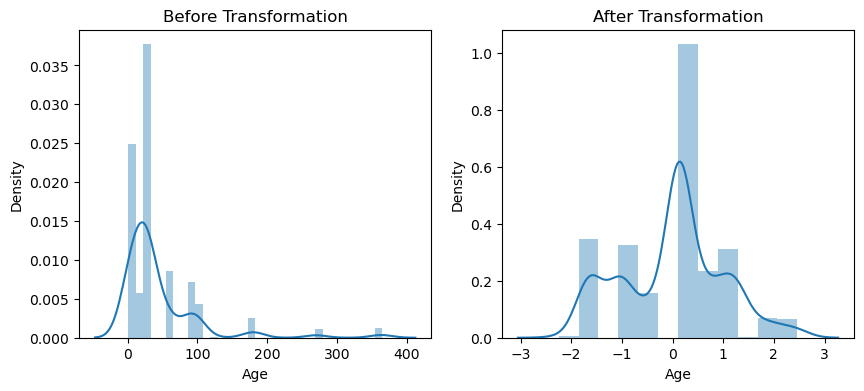

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_title('Before Transformation')
sns.distplot(X_train['Age'],ax=ax1)

ax2.set_title('After Transformation')
sns.distplot(X_train_transformed2['Age'],ax=ax2);